In [1]:
from scipy.linalg import eig
import numpy as np
import matplotlib.pyplot as plt


In [2]:
m1 = m2 = m3 = 800
k1 = 60.165E6


M = np.array([[m1+1,0,0],[0,m2,0],[0,0,m3]])
K = np.array([[2*k1,-2*k1,1],[-2*k1,4*k1,-2*k1],[0,-2*k1,2*k1]])
C = np.array([[0,0,0],[0,0,0],[0,0,0]])

print('Mass Matrix:')
print(M)
print('Stiffness Matrix:')
print(K)

Eig_value,Eig_vector = eig(K,M)

Eig_vector = np.flip(Eig_vector,axis = 1)
Eig_vector = Eig_vector/Eig_vector[0,:]

w = np.sqrt(np.real(np.flip(Eig_value)))
#Get Hz
f = w / (2*np.pi)

for idx, i in enumerate(Eig_value):
    print('            ######### Mode',idx+1,'#########')
    print('Rotational Frequency:',w[idx],'[rad/s]')
    print('Frequency           :',f[idx],'[Hz]')
    print('Mode Shape          :',Eig_vector[:,idx])

Mass Matrix:
[[801   0   0]
 [  0 800   0]
 [  0   0 800]]
Stiffness Matrix:
[[ 1.2033e+08 -1.2033e+08  1.0000e+00]
 [-1.2033e+08  2.4066e+08 -1.2033e+08]
 [ 0.0000e+00 -1.2033e+08  1.2033e+08]]
            ######### Mode 1 #########
Rotational Frequency: 0.02040816323585025 [rad/s]
Frequency           : 0.003248060058411857 [Hz]
Mode Shape          : [1.         1.00000001 1.00000001]
            ######### Mode 2 #########
Rotational Frequency: 387.70940099747344 [rad/s]
Frequency           : 61.70586765194572 [Hz]
Mode Shape          : [ 1.00000000e+00 -6.24809089e-04 -1.00062520e+00]
            ######### Mode 3 #########
Rotational Frequency: 671.6722705775568 [rad/s]
Frequency           : 106.89996200017518 [Hz]
Mode Shape          : [ 1.         -2.00312519  1.00187519]


## Q3

In [7]:
## Force vector
F = np.array([1000,0])
k1 = 2.48E6
k2 = 100440

M = np.array([[100,0],[0,5]])
K = np.array([[k1+k2,-k2],[-k2,k2]])
C = np.array([[0,0],[0,0]])

Eig_value,Eig_vector = eig(K,M)

Eig_vector = np.flip(Eig_vector,axis = 1)
Eig_vector = Eig_vector/Eig_vector[0,:]

w = np.sqrt(np.real(np.flip(Eig_value)))
#Get Hz
f = w / (2*np.pi)

for idx, i in enumerate(Eig_value):
    print('            ######### Mode',idx+1,'#########')
    print('Rotational Frequency:',w[idx],'[rad/s]')
    print('Frequency           :',f[idx],'[Hz]')
    print('Mode Shape          :',Eig_vector[:,idx])

            ######### Mode 1 #########
Rotational Frequency: 132.74838051216236 [rad/s]
Frequency           : 21.127560945954468 [Hz]
Mode Shape          : [1.         8.14642321]
            ######### Mode 2 #########
Rotational Frequency: 168.13764442086776 [rad/s]
Frequency           : 26.759937229408543 [Hz]
Mode Shape          : [ 1.         -2.45506518]


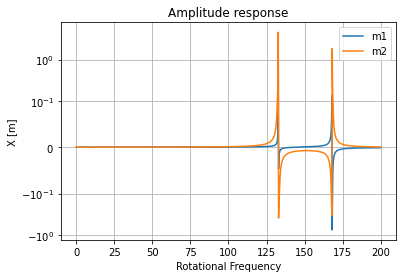

In [12]:
def Amplitude(omega):
    X = []
    for i in omega:
        Z = (-(i**2)*M) + (i*(1j)*C) + K
        X.append(np.matmul(np.linalg.inv(Z),F).real)
    return np.ndarray.tolist(np.transpose(X))


w = np.linspace(0,200,1000)
Amp = Amplitude(w)


plt.figure()
plt.title('Amplitude response')
plt.xlabel('Rotational Frequency')
plt.ylabel('X [m]')
plt.yscale('symlog', linthresh=0.1)
for i in range(len(Amp)):
    plt.plot(w,Amp[i], label= 'm' + str(i+1))

plt.legend()
plt.grid()

In [9]:
Amplitude([50*np.pi])

[[0.001808338034453411], [-0.007921022085321652]]